In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filePath = "data/Supplementary_Table_2_fitness_scores_normalized.txt"
data = pd.read_csv(filePath, sep="\t")
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
             domain_ID uniprot_ID                  aa_seq wt_aa  position  \
0  P57071_PF00096_1085     P57071  *CEQCGKSFARKDMLKEHMRVH     A    1085.0   
1  P57071_PF00096_1085     P57071  A*EQCGKSFARKDMLKEHMRVH     C    1086.0   
2  P57071_PF00096_1085     P57071  AAEQCGKSFARKDMLKEHMRVH     C    1086.0   
3  P57071_PF00096_1085     P57071  AC*QCGKSFARKDMLKEHMRVH     E    1087.0   
4  P57071_PF00096_1085     P57071  ACAQCGKSFARKDMLKEHMRVH     E    1087.0   

  mut_aa   STOP  input_count_rep1  input_count_rep2  input_count_rep3  \
0      *   True              73.0              89.0              84.0   
1      *   True              59.0              82.0              78.0   
2      A  False             190.0             223.0             191.0   
3      *   True             161.0             179.0             149.0   
4      A  False             150.0             161.0             128.0   

   output_count_rep1  output_count_rep2  output_count_rep3  

    mutation  normalized_fitness wt_aa mut_aa
0         AC           -0.182701     A      C
1         AD           -0.276117     A      D
2         AE           -0.183584     A      E
3         AF           -0.348481     A      F
4         AG           -0.200689     A      G
..       ...                 ...   ...    ...
375       YR           -0.276621     Y      R
376       YS           -0.261555     Y      S
377       YT           -0.272153     Y      T
378       YV           -0.271224     Y      V
379       YW           -0.195036     Y      W

[380 rows x 4 columns]


<Axes: xlabel='normalized_fitness', ylabel='Count'>

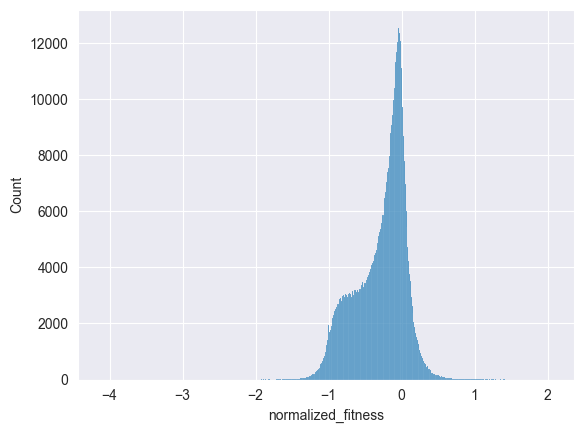

In [2]:
dataFiltered = data[["domain_ID", "uniprot_ID", "aa_seq", "wt_aa", "position", "mut_aa", "normalized_fitness"]]
dataFiltered = dataFiltered[dataFiltered['mut_aa'] != '*']

dataFiltered['mutation'] = dataFiltered['wt_aa']+ dataFiltered['mut_aa']

groupedData = dataFiltered.groupby('mutation')['normalized_fitness'].mean().reset_index()

groupedData['wt_aa'] = groupedData['mutation'].str[0]
groupedData['mut_aa'] = groupedData['mutation'].str[1]
print(groupedData)
sns.histplot(dataFiltered,x="normalized_fitness")

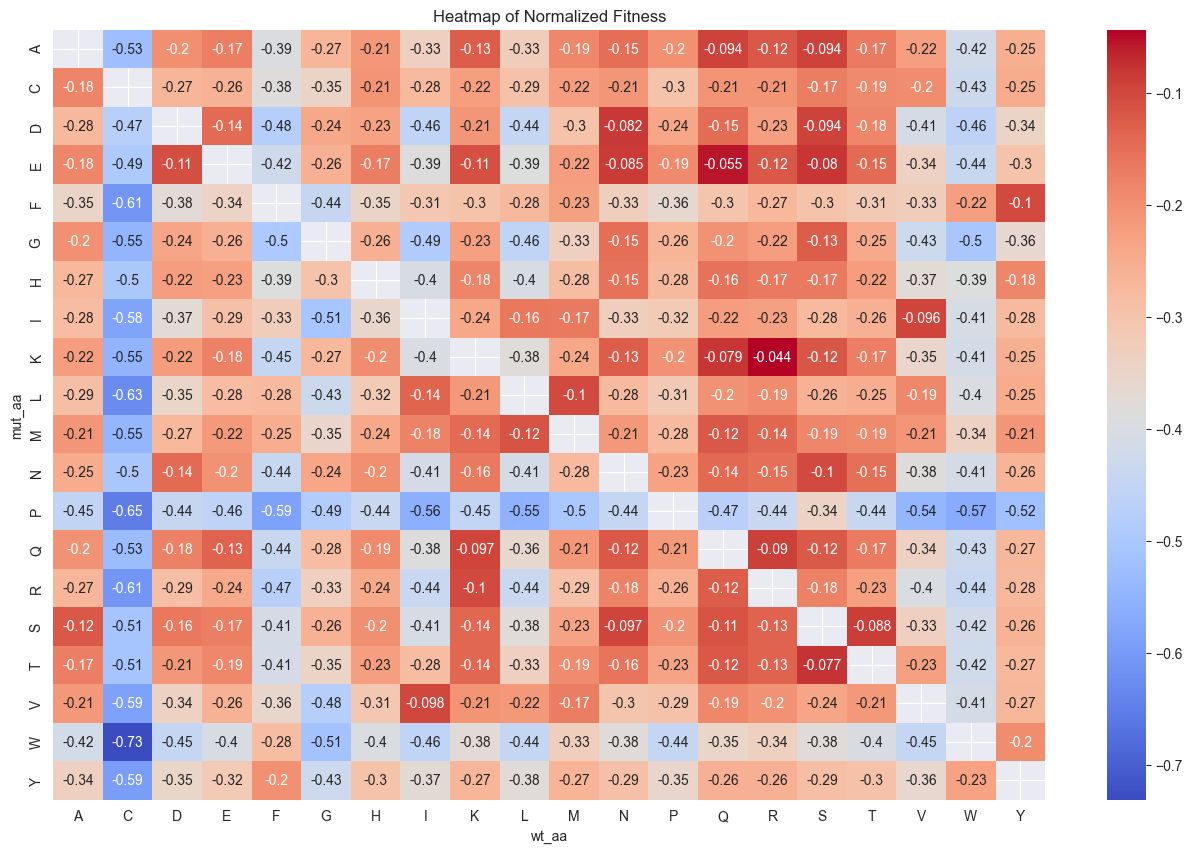

In [3]:
pivot_df = groupedData.pivot(index='mut_aa', columns='wt_aa', values='normalized_fitness')

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Heatmap of Normalized Fitness')
plt.xlabel('wt_aa')
plt.ylabel('mut_aa')
#plt.savefig('heatmap_normalized_fitness.png', format='png')
plt.show()

In [7]:
pivot_df

wt_aa,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
mut_aa,,,,,,,,,,,,,,,,,,,,
A,NaN,-0.525818,-0.199197,-0.172879,-0.393234,-0.268830,-0.211580,-0.331325,-0.125705,-0.327396,-0.187362,-0.150434,-0.200159,-0.093810,-0.121543,-0.093820,-0.169183,-0.224511,-0.418678,-0.253680
C,-0.182701,NaN,-0.266732,-0.260221,-0.383445,-0.346395,-0.205779,-0.277362,-0.224490,-0.293562,-0.223566,-0.209853,-0.297436,-0.206647,-0.206246,-0.170371,-0.189793,-0.195058,-0.429344,-0.249515
D,-0.276117,-0.474484,NaN,-0.144277,-0.477588,-0.242421,-0.230685,-0.456564,-0.207554,-0.444375,-0.297602,-0.082247,-0.238723,-0.146021,-0.225640,-0.093857,-0.183560,-0.407600,-0.460338,-0.344968
E,-0.183584,-0.494353,-0.106964,NaN,-0.424258,-0.257746,-0.172180,-0.386019,-0.110368,-0.387473,-0.221812,-0.085253,-0.190852,-0.054651,-0.121475,-0.079551,-0.145034,-0.337279,-0.440146,-0.298182
F,-0.348481,-0.608285,-0.375059,-0.343193,NaN,-0.441891,-0.347536,-0.308270,-0.298677,-0.276361,-0.228355,-0.328551,-0.362872,-0.300698,-0.274639,-0.298017,-0.313299,-0.327804,-0.224733,-0.102158
G,-0.200689,-0.547649,-0.236044,-0.257015,-0.497181,NaN,-0.258278,-0.487740,-0.226335,-0.456665,-0.331202,-0.150569,-0.264895,-0.202785,-0.221050,-0.125308,-0.245108,-0.425577,-0.504958,-0.360087
H,-0.272733,-0.497964,-0.222826,-0.228342,-0.388976,-0.297767,NaN,-0.402971,-0.182966,-0.402729,-0.283233,-0.154262,-0.275099,-0.155657,-0.165236,-0.165788,-0.221039,-0.371987,-0.390008,-0.183665
I,-0.281599,-0.582929,-0.373269,-0.291882,-0.327308,-0.507853,-0.355521,NaN,-0.240094,-0.164236,-0.165019,-0.329325,-0.317699,-0.221905,-0.227453,-0.279917,-0.257835,-0.096194,-0.406187,-0.277640
K,-0.221231,-0.549146,-0.220256,-0.176982,-0.446517,-0.272918,-0.196210,-0.396731,NaN,-0.381187,-0.241735,-0.125112,-0.203110,-0.079051,-0.043734,-0.118240,-0.174721,-0.353091,-0.414204,-0.254895


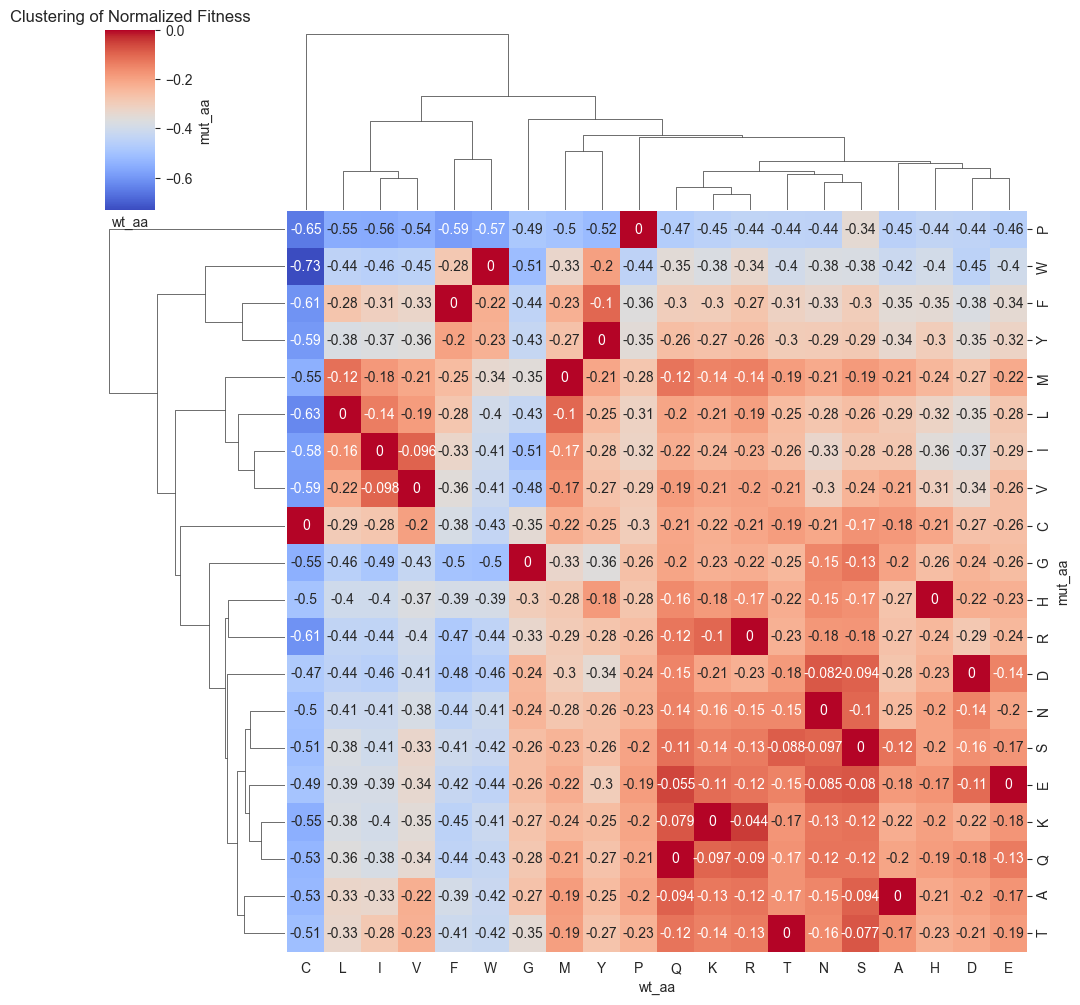

In [10]:
pivot_df_filled = pivot_df.fillna(0)
sns.clustermap(pivot_df_filled, annot=True, cmap='coolwarm')
plt.title('Clustering of Normalized Fitness')
plt.xlabel('wt_aa')
plt.ylabel('mut_aa')
plt.show()